In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections
import gridded
%matplotlib inline

In [3]:
print(gridded.__version__)

0.1.5


In [4]:
url = (r'c01_harlingen\dflowfm\dflowfmoutput\001_map.nc')
simid = 'harlingen'
ds = gridded.Dataset(url)

in infer_location <class 'netCDF4._netCDF4.Variable'>
int32 mesh2d()
    cf_role: mesh_topology
    long_name: Topology data of 2D network
    topology_dimension: 2
    node_coordinates: mesh2d_node_x mesh2d_node_y
    node_dimension: nmesh2d_node
    max_face_nodes_dimension: max_nmesh2d_face_nodes
    edge_node_connectivity: mesh2d_edge_nodes
    edge_dimension: nmesh2d_edge
    edge_coordinates: mesh2d_edge_x mesh2d_edge_y
    face_node_connectivity: mesh2d_face_nodes
    face_dimension: nmesh2d_face
    edge_face_connectivity: mesh2d_edge_faces
    face_coordinates: mesh2d_face_x mesh2d_face_y
unlimited dimensions: 
current shape = ()
filling off

in infer_location <class 'netCDF4._netCDF4.Variable'>
int32 projected_coordinate_system()
    name: Unknown projected
    epsg: 28992
    grid_mapping_name: Unknown projected
    longitude_of_prime_meridian: 0.0
    semi_major_axis: 6378137.0
    semi_minor_axis: 6356752.314245
    inverse_flattening: 298.257223563
    proj4_params: 
    

In [5]:
# now we retrieve four different info from the read nc-file
# - type of grid
# - number of nodes
# - number of faces
# - vertices per face
print(ds.grid.info)

UGrid object:
Number of nodes: 12845
Number of faces: 16597 with 5 vertices per face


In [6]:
# the nc-file is a Unstructered Grid with 12845 number of nodes 
# and 16597   number of faces where each face has 5 vertices

In [7]:
# next, lets check the variables within the dataset"
print("variables available and their standard names:\n")
for name, var in ds.variables.items():
    try:
        print(name, ":", var.attributes['standard_name'])
    except KeyError:
        pass

variables available and their standard names:

mesh2d_node_z : altitude
mesh2d_face_x_bnd : projection_x_coordinate
mesh2d_face_y_bnd : projection_y_coordinate
mesh2d_flowelem_ba : cell_area
mesh2d_flowelem_bl : altitude
mesh2d_Numlimdt : 
mesh2d_s1 : sea_surface_height
mesh2d_waterdepth : sea_floor_depth_below_sea_surface
mesh2d_s0 : sea_surface_height
mesh2d_ucx : sea_water_x_velocity
mesh2d_ucy : sea_water_y_velocity
mesh2d_ucmag : sea_water_speed
mesh2d_ucxq : ucxq_velocity
mesh2d_ucyq : ucyq_velocity
mesh2d_taus : 
mesh2d_czs : 
mesh2d_sa1 : sea_water_salinity


In [8]:
# we are interested in the sea surface height:

variable = 'mesh2d_flowelem_bl'
#variable = 'mesh2d_ucmag'

var = ds.variables[variable]

In [9]:
var.attributes

{'mesh': 'mesh2d',
 'location': 'face',
 'coordinates': 'mesh2d_face_x mesh2d_face_y',
 'cell_methods': 'nmesh2d_face: mean',
 'standard_name': 'altitude',
 'long_name': 'flow element center bedlevel (bl)',
 'units': 'm',
 'grid_mapping': 'projected_coordinate_system',
 '_FillValue': -999.0}

In [10]:
# the first and last step of this variable are at?
print("minimum time:", var.time.min_time)
print("manimum time:", var.time.max_time)
time_arr = var.time.get_time_array()

minimum time: 2019-03-14 09:40:55.666590
manimum time: 2019-03-14 09:40:55.666590


In [11]:
# Get the data, here last index
time_interest = var.time.max_time
if len(time_arr)>1 :
    # get last time
    data_color = var.data[-1,:]
else :
    data_color = var.data

print('len(data_color): ',len(data_color))

len(data_color):  16597


In [12]:
# note that we are working with just the variable object now...

# NOTE: this model is in xRD,yRD, however, gridded maps this to variables node_lon/node_lat

x = var.grid.node_lon  # here in RD!
y = var.grid.node_lat  # here in RD!

faces = var.grid.faces
edges = var.grid.edges
nodes = var.grid.nodes

In [13]:
# fill value to fill vertices up to max nodes in face
#fill_val = -999

fill_val = int(var.attributes["_FillValue"])


In [14]:
str(fill_val)

'-999'

### filter the faces using the `fill_val`

In [15]:
# start filtering the fill value from the faces

faces = np.array(faces)  # eerst een array van maken, anders heeft onderstaande regel niet het gewenste resultaat.
faces = np.array([i[i != fill_val] for i in faces])
print(faces)

[array([4491, 4586, 4587, 4492]) array([4586, 4681, 4682, 4587])
 array([4490, 4585, 4586, 4491]) ... array([ 649,  650, 3104])
 array([ 648, 3104, 3106]) array([ 648,  649, 3104])]


### combine `x` and `y` and slice using `faces`

In [16]:
# stack array along last axis
xy = np.c_[x, y]
patches = np.array([xy[face] for face in faces])
patches[0]

array([[157199.66390762, 589428.61886387],
       [157286.14722073, 589326.1202697 ],
       [157425.71179928, 589444.67722713],
       [157338.77823183, 589543.44016282]])

In [17]:
patches[0:5]

array([array([[157199.66390762, 589428.61886387],
       [157286.14722073, 589326.1202697 ],
       [157425.71179928, 589444.67722713],
       [157338.77823183, 589543.44016282]]),
       array([[157286.14722073, 589326.1202697 ],
       [157373.55017757, 589223.61186279],
       [157513.61510208, 589344.54971485],
       [157425.71179928, 589444.67722713]]),
       array([[157057.6008947 , 589311.35494877],
       [157144.04390216, 589207.05290808],
       [157286.14722073, 589326.1202697 ],
       [157199.66390762, 589428.61886387]]),
       array([[157373.55017757, 589223.61186279],
       [157462.01336664, 589120.47485128],
       [157602.90204036, 589242.37928548],
       [157513.61510208, 589344.54971485]]),
       array([[157144.04390216, 589207.05290808],
       [157231.38509032, 589103.02737085],
       [157373.55017757, 589223.61186279],
       [157286.14722073, 589326.1202697 ]])], dtype=object)

In [27]:
from shapely.geometry import Polygon, MultiPolygon

In [56]:
import geopandas as gpd
import pandas as pd
import topojson

In [65]:
g1 = Polygon(patches[0])

In [74]:
g2 = shapely.geometry.polygon.orient(g1, sign=-1)

In [75]:
g2.exterior.is_ccw

False

In [76]:
g1.exterior.is_ccw

True

In [58]:
#topojson.topology(gdf)

In [51]:
gdf.total_bounds

array([148129.21743194, 572813.625     , 162237.21875   , 589543.44016282])

In [77]:
df = pd.DataFrame(
    {'var': data_color[:].data,      
     'geometry': [shapely.geometry.polygon.orient(Polygon(patch), sign=-1) for patch in patches]})
gdf = gpd.GeoDataFrame(df)

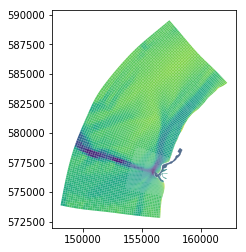

In [78]:
gdf.plot(column='var', cmap='viridis')

In [79]:
#xmin, ymin, xmax, ymax = gdf.total_bounds
xmin = 155400
xmax = 156500
ymin = 576400
ymax = 577100
gdf_slice = gdf.cx[xmin:xmax, ymin:ymax]

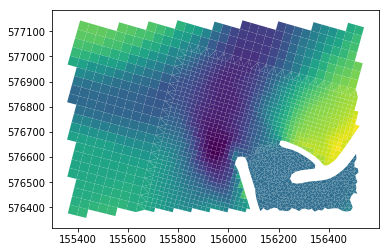

In [80]:
gdf_slice.plot(column='var', cmap='viridis')

In [89]:
gdf_slice.to_file('mesh2d_flowelem_bl.json', driver='GeoJSON')

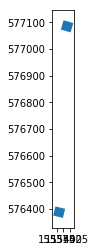

In [81]:
gdf_slice[0:2].plot()

In [87]:
import altair as alt
import gpdvega
alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

In [88]:
# GeoDataFrame could be passed as usual pd.DataFrame
alt.Chart(gdf_slice[0:2]).mark_geoshape(
).project(
).encode(
    color='var'
).properties(
    width=500,
    height=300
)

TypeError: __init__() got an unexpected keyword argument 'orient'

Chart({
  data:            var                                           geometry
  6030 -2.882620  POLYGON ((155426.6584150947 577062.2792045125,...
  6084 -4.095146  POLYGON ((155406.2715163126 576401.1492660295,...,
  encoding: EncodingWithFacet({
    color: Color({
      shorthand: 'var'
    })
  }),
  height: 300,
  mark: 'geoshape',
  projection: Projection({
    type: 'mercator'
  }),
  width: 500
})

In [60]:
gdf_slice[0:2].__geo_interface__

{'type': 'FeatureCollection',
 'features': [{'id': '6030',
   'type': 'Feature',
   'properties': {'var': -2.8826195},
   'geometry': {'type': 'Polygon',
    'coordinates': (((155426.65841509466, 577062.2792045125),
      (155436.6836915163, 577097.2636538353),
      (155400.22831213305, 577107.7547617524),
      (155390.16842009855, 577072.7086471558),
      (155426.65841509466, 577062.2792045125)),)},
   'bbox': (155390.16842009855,
    577062.2792045125,
    155436.6836915163,
    577107.7547617524)},
  {'id': '6084',
   'type': 'Feature',
   'properties': {'var': -4.095145866666667},
   'geometry': {'type': 'Polygon',
    'coordinates': (((155406.27151631255, 576401.1492660295),
      (155369.90644526246, 576410.1941950414),
      (155361.44870526658, 576376.0930091065),
      (155397.8433228553, 576367.108831827),
      (155406.27151631255, 576401.1492660295)),)},
   'bbox': (155361.44870526658,
    576367.108831827,
    155406.27151631255,
    576410.1941950414)}],
 'bbox': (1553

In [52]:
xmin

NameError: name 'xmin' is not defined

In [32]:
list_bk = [obj[~np.isnan(obj)].astype(int).tolist() for obj in patches]

In [45]:
df.head()

,var,geometry
0,-0.936219,"POLYGON ((157199.6639076216 589428.6188638705,..."
1,-0.832378,"POLYGON ((157286.1472207259 589326.1202697037,..."
2,-0.884936,"POLYGON ((157057.6008947003 589311.3549487717,..."
3,-0.750457,"POLYGON ((157373.5501775729 589223.6118627909,..."
4,-0.830115,"POLYGON ((157144.0439021561 589207.0529080761,..."


In [36]:
mp = MultiPolygon()

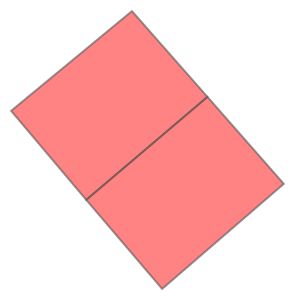

In [39]:
mp[0:2]

### plot the figure using `PolyCollection` for `facecolor`

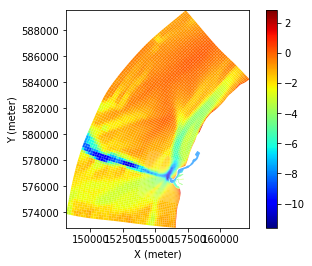

In [18]:
%matplotlib inline
fig = plt.figure()

ax = fig.add_subplot(111)

colors = data_color
p = matplotlib.collections.PolyCollection(patches, cmap=matplotlib.cm.jet)
p.set_array(colors)
ax.add_collection(p)

ax.set_xlim(x.min(),x.max())
ax.set_ylim(y.min(),y.max())

plt.xlabel('X (meter)')
plt.ylabel('Y (meter)')

plt.colorbar(p)
plt.gca().set_aspect('equal')
plt.show()

## ZOOM

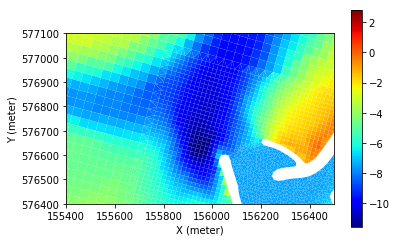

In [20]:
%matplotlib inline
fig = plt.figure()

ax = fig.add_subplot(111)

colors = data_color
p = matplotlib.collections.PolyCollection(patches, cmap=matplotlib.cm.jet)
p.set_array(colors)
ax.add_collection(p)

ax.set_xlim(155400,156500)
ax.set_ylim(576400,577100)

plt.xlabel('X (meter)')
plt.ylabel('Y (meter)')

plt.colorbar(p)
plt.gca().set_aspect('equal')
plt.show()

### plot the figure using `PolyCollection` for `facecolor` AND `edgecolor` black

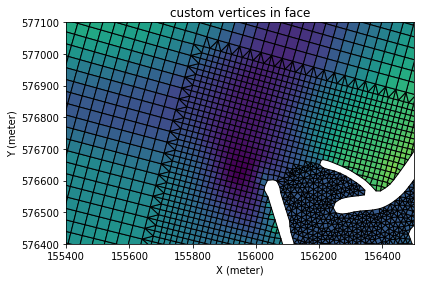

In [21]:
# figure uses coloring for both facecolor and edgecolor
plt.figure()
plt.gca().set_aspect('equal')
ax=plt.gca()

# FACES
# add collection of faces with color for face and edge
pc_face = matplotlib.collections.PolyCollection(patches, array=data_color, cmap='viridis', edgecolor='black')
#, edgecolor='face')

# pc_face.set_clim([data_color[:].min(), data_color[:].max()])
ax.add_collection(pc_face)

# somehow we need to define xmax/ymax, otherwise [0..1,0..1]?
ax.set_xlim(155400,156500)
ax.set_ylim(576400,577100)

plt.title('custom vertices in face')
plt.xlabel('X (meter)')
plt.ylabel('Y (meter)')

plt.tight_layout()
plt.show()

### plot the figure using `PolyCollection` for `facecolor` AND `edgecolor` black

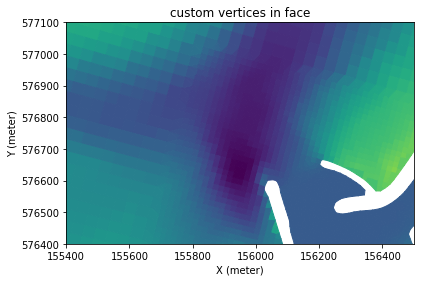

In [22]:
# figure uses coloring for both facecolor and edgecolor
plt.figure()
plt.gca().set_aspect('equal')
ax=plt.gca()

# FACES
# add collection of faces with color for face and edge
pc_face = matplotlib.collections.PolyCollection(patches, array=data_color, cmap='viridis', edgecolor='face')
#, edgecolor='face')

# pc_face.set_clim([data_color[:].min(), data_color[:].max()])
ax.add_collection(pc_face)

# somehow we need to define xmax/ymax, otherwise [0..1,0..1]?
ax.set_xlim(155400,156500)
ax.set_ylim(576400,577100)

plt.title('custom vertices in face')
plt.xlabel('X (meter)')
plt.ylabel('Y (meter)')

plt.tight_layout()
plt.show()

### plot the figure using `PolyCollection` ONLY `edgecolor`

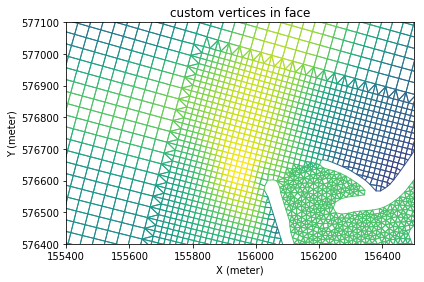

In [23]:
# figure uses coloring for edgecolor only
plt.figure()
plt.gca().set_aspect('equal')
ax=plt.gca()

# add collection of faces with edgecolor only
pc_edge = matplotlib.collections.PolyCollection(patches, array=data_color, 
                                                cmap='viridis_r', color='', facecolor='none')
ax.add_collection(pc_edge)

ax.set_xlim(155400,156500)
ax.set_ylim(576400,577100)

plt.title('custom vertices in face')
plt.xlabel('X (meter)')
plt.ylabel('Y (meter)')

plt.tight_layout()
plt.show()